In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.layers import Dropout


In [2]:
IMAGE_SIZE=[224,224]

In [3]:
train_path= r'C:\Users\mallu\Desktop\dataset\images\train/'
valid_path=r'C:\Users\mallu\Desktop\dataset\images\validation/'



In [4]:
# add preprocessing layer to the front of VGG
vgg=VGG16(input_shape=IMAGE_SIZE+[3] , weights='imagenet' , include_top=False) 

In [5]:
# dont train existing weight
for layer in vgg.layers:
    layer.trainable=False

#useful for getting number of classes

folders=glob(r'C:\Users\mallu\Desktop\dataset\images\train/*')


In [6]:
# making our own layers you can add more layers you want

x=Flatten()(vgg.output)
prediction=Dense(len(folders), activation='softmax')(x)

In [7]:
model=Model(inputs=vgg.input,outputs=prediction)


model.summary()
 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [9]:
test_datagen=ImageDataGenerator(rescale=1./255)
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [10]:
training_set=train_datagen.flow_from_directory(r'C:\Users\mallu\Desktop\dataset\images\train/',target_size=(224,224),batch_size=8,class_mode='categorical')

testing_set=test_datagen.flow_from_directory(r'C:/Users/mallu/Desktop/dataset/images/validation/',target_size=(224,224),batch_size=8,class_mode='categorical')


Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [11]:
fitting=model.fit(training_set,validation_data=testing_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(testing_set))

Epoch 1/10
38/38 [==============================] - 166s 4s/step - loss: 0.2598 - accuracy: 0.9167 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 165s 4s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 6.2470e-04 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 165s 4s/step - loss: 3.8080e-04 - accuracy: 1.0000 - val_loss: 1.3455e-04 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 166s 4s/step - loss: 1.9763e-04 - accuracy: 1.0000 - val_loss: 8.0338e-05 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 164s 4s/step - loss: 1.2671e-04 - accuracy: 1.0000 - val_loss: 6.0821e-05 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 164s 4s/step - loss: 1.2408e-04 - accuracy: 1.0000 - val_loss: 4.8492e-05 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 185s 5s/step - loss: 9.7268e-05 - accuracy: 1.0000 - val_loss: 4.1

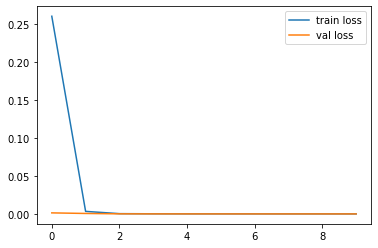

In [12]:
plt.plot(fitting.history['loss'],label='train loss')
plt.plot(fitting.history['val_loss'],label='val loss')
plt.legend()
plt.savefig(r'C:\Users\mallu\Desktop\dataset\model performance\loss_validation')

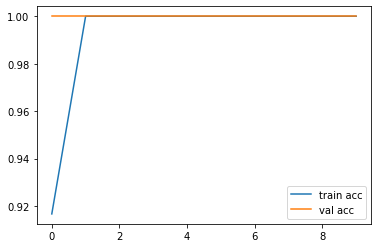

In [13]:
plt.plot(fitting.history['accuracy'],label='train acc')
plt.plot(fitting.history['val_accuracy'],label='val acc')

plt.legend()
plt.savefig(r'C:\Users\mallu\Desktop\dataset\model performance\accuracy')

In [14]:
model.save(r'C:\Users\mallu\Desktop\dataset\model performance\face_recognition.h5')